In [1]:
%matplotlib inline

import pandas as pd

r = pd.read_csv( '../goodbooks-10k/ratings.csv' )
tr = pd.read_csv( '../goodbooks-10k/to_read.csv' )
b = pd.read_csv( '../goodbooks-10k/books.csv' )

t = pd.read_csv( '../goodbooks-10k/tags.csv' )
bt = pd.read_csv( '../goodbooks-10k/book_tags.csv')


### Ratings

In [2]:
r.head()

,user_id,book_id,rating
0,1,258,5
1,2,4081,4
2,2,260,5
3,2,9296,5
4,2,2318,3


Ratings are sorted chronologically, oldest first.

In [3]:
len(r)

5976479

<Axes: >

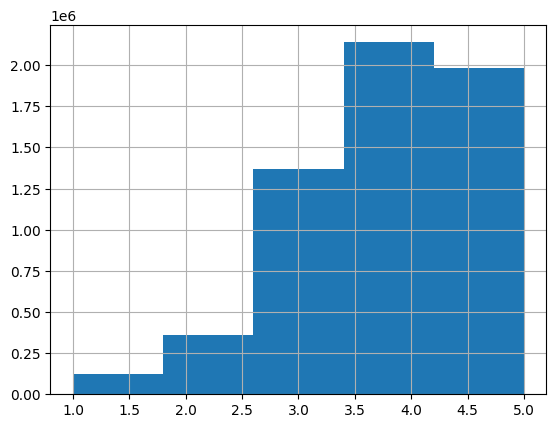

In [4]:
r.rating.hist( bins = 5 )

It appears that 4 is the most popular rating. There are relatively few ones and twos.

### To read
These are the books users marked "to read".


In [5]:
tr.head()

,user_id,book_id
0,9,8
1,15,398
2,15,275
3,37,7173
4,34,380


In [6]:
len(tr)

912705

Most books have been marked to read by somebody. Majority of the users have some books marked to read.

In [7]:
len(tr.book_id.unique())

9986

In [8]:
len(tr.user_id.unique())

48871

### Books

In [9]:
b.head()

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


Books are sorted by their popularity, as measured by number of ratings (overall, not in this dataset).

In [10]:
len(b)

10000

### User and book IDs

In [11]:
r.user_id.max()

np.int64(53424)

In [12]:
r.book_id.max()

np.int64(10000)

The IDs are contiguous.

In [13]:
assert( len( r.user_id.unique()) == r.user_id.max())
assert( len( r.book_id.unique()) == r.book_id.max())

### Reviews per book

Most books have a few hundred reviews, but some have as few as eight.

In [14]:
reviews_per_book = r.groupby( 'book_id' ).book_id.apply( lambda x: len( x ))
reviews_per_book.describe()

count    10000.000000
mean       597.647900
std       1267.289788
min          8.000000
25%        155.000000
50%        248.000000
75%        503.000000
max      22806.000000
Name: book_id, dtype: float64

In [15]:
reviews_per_book.sort_values().head( 10 )

book_id
7803     8
9345    11
9486    24
1935    33
9315    36
9553    41
8181    45
9260    48
9479    48
9705    50
Name: book_id, dtype: int64

### Reviews per user

All users have at least 19 reviews.

In [16]:
reviews_per_user = r.groupby( 'user_id' ).user_id.apply( lambda x: len( x ))
reviews_per_user.describe()

count    53424.000000
mean       111.868804
std         26.071224
min         19.000000
25%         96.000000
50%        111.000000
75%        128.000000
max        200.000000
Name: user_id, dtype: float64

In [17]:
reviews_per_user.sort_values().head( 10 )

user_id
34590    19
43675    20
51725    21
40753    21
32128    21
16470    22
48077    22
25856    22
40299    22
42736    22
Name: user_id, dtype: int64

### Tags

In [18]:
t.head()

,tag_id,tag_name
0,0,-
1,1,--1-
2,2,--10-
3,3,--12-
4,4,--122-


In [19]:
len(t)

34252

In [20]:
bt.head()

,goodreads_book_id,tag_id,count
0,1,30574,167697
1,1,11305,37174
2,1,11557,34173
3,1,8717,12986
4,1,33114,12716


Tag applications are sorted by goodreads_book_id ASC and by count DESC.

In [21]:
len(bt)

999912

Let us merge tag names into tag applications.

In [22]:
bt = bt.merge( t, on = 'tag_id' )

Why don't we merge book titles for good measure.

In [23]:
bt = bt.merge( b[[ 'goodreads_book_id', 'title']], on = 'goodreads_book_id' )

It appears that there are some negative tag counts. Let's fix this.

In [24]:
bt['count'].describe()

count    999912.000000
mean        208.869633
std        3501.265173
min          -1.000000
25%           7.000000
50%          15.000000
75%          40.000000
max      596234.000000
Name: count, dtype: float64

In [25]:
bt.loc[ bt['count'] < 0, 'count'] = 0

Sample some popular book tags.

In [26]:
bt.sample( 10, weights = 'count')


,goodreads_book_id,tag_id,count,tag_name,title
751594,9439989,30574,32509,to-read,"Touch of Frost (Mythos Academy, #1)"
489194,355697,30574,104402,to-read,All Quiet on the Western Front
11100,1274,30574,79656,to-read,"Men Are from Mars, Women Are from Venus"
890994,17347389,30574,62311,to-read,"The Dream Thieves (The Raven Cycle, #2)"
441310,227651,26771,269,sci-fi,"Among the Hidden (Shadow Children, #1)"
873098,16131484,26771,1214,sci-fi,"The Infinite Sea (The 5th Wave, #2)"
578105,1011359,27699,48,shoujo,"Ouran High School Host Club, Vol. 2 (Ouran Hig..."
168800,24765,30574,54575,to-read,"Specials (Uglies, #3)"
355101,104379,33114,1073,young-adult,That Summer
730994,8255917,30574,3929,to-read,Washington: A Life


These are the most popular tags:

In [27]:
tag_counts = bt.groupby( 'tag_name' ).tag_name.count().sort_values( ascending = False )
tag_counts.head( 20 )

tag_name
to-read              9983
favorites            9881
owned                9858
books-i-own          9799
currently-reading    9776
library              9415
owned-books          9221
fiction              9097
to-buy               8692
kindle               8316
default              8239
ebook                8054
my-books             7561
audiobook            7242
ebooks               7203
wish-list            7192
my-library           7000
audiobooks           6862
i-own                6670
adult                6604
Name: tag_name, dtype: int64

Take books and have a look at reviews per book


In [28]:

# Merge ratings with books on book_id
merged = pd.merge(r, b, left_on='book_id', right_on='book_id', how='left')

# Group by book id and title, then count number of ratings
rating_counts = merged.groupby(['book_id', 'title']).size().reset_index(name='rating_count')

#Sort by review count descending
rating_counts = rating_counts.sort_values(by='rating_count', ascending=True)

#Display the result
rating_counts.head(50)

,book_id,title,rating_count
7802,7803,Kindle User's Guide,8
9344,9345,Diary ng Panget,11
9485,9486,Fifty Shades Duo: Fifty Shades Darker / Fifty ...,24
1934,1935,Kindle Paperwhite User's Guide,33
9314,9315,The King's Agent,36
9552,9553,"Attack on Titan: No Regrets, Volume 01",41
8180,8181,"The Batman Chronicles, Vol. 1",45
9259,9260,"The Magic (The Secret, #3)",48
9478,9479,Manga Classics: Les Misérables,48
9704,9705,The Lake (The Lake Trilogy #1),50


In [30]:
filtered_bt = tag_counts[tag_counts['tag_name'].str.contains('sci', case=False, na=False)]


KeyError: 'tag_name'

In [31]:
print(tag_counts.columns)



AttributeError: 'Series' object has no attribute 'columns'

In [32]:
print(tag_counts.head())
print(tag_counts.index)



tag_name
to-read              9983
favorites            9881
owned                9858
books-i-own          9799
currently-reading    9776
Name: tag_name, dtype: int64
Index(['to-read', 'favorites', 'owned', 'books-i-own', 'currently-reading',
       'library', 'owned-books', 'fiction', 'to-buy', 'kindle',
       ...
       '小說-奇幻小說', '日本文学', '골든', 'Ｍａｎｇａ', 'ＳＥＲＩＥＳ', '--33-', 'وان-پیس',
       '--258-', '--2-', '--19-'],
      dtype='object', name='tag_name', length=34252)
